<a href="https://colab.research.google.com/github/shba007/biosense-ai/blob/feature/golden_pothos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#credit to https://www.kaggle.com/code/sureshmecad/fruit-images-for-object-detection/notebook

In [ ]:
#editHERE
!unzip /content/goleden_pothos.zip -d golden_pothos

In [3]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras import applications

In [4]:
all_img=os.mkdir("/content/all_images")
train=os.mkdir("/content/train")
test=os.mkdir("/content/test")
val=os.mkdir("/content/val")

In [5]:
# import shutil

# path = '/content/catdogchick'
# i = 0

# for foldername in os.listdir(path):
#   for filename in os.listdir(os.path.join(path,foldername)):
#       print(os.path.join(path,foldername,filename))
#       os.rename(os.path.join(path,foldername,filename), os.path.join(foldername+"_"+str(i)+'.jpg'))
#       shutil.move(os.path.join(foldername+"_"+str(i)+'.jpg'), "/content/all_images")
#       i = i +1

In [6]:
import os
import random
import shutil

names=[]

class Target:
    def __init__(self, target_path: str, ratio: int, number_of_source_files: int):
        self._target_path = target_path
        self._max = int(number_of_source_files / 100 * ratio)
        self._counter = 0

    @property
    def target_path(self):
        self._counter += 1
        return self._target_path

    def is_maxed_out(self):
        return True if self._counter >= self._max else False


def get_random_target(target_list):
    if len(target_list) > 0:
        return random.choice(target_list)
    else:
        print(target_list)
        # return random.choice([validation, testing, training])

ratio_train=0.7
ratio_val=0
ratio_test=0.3

def placeimg(folder_path,name):
  path_source = folder_path
  os.mkdir(os.path.join('/content/val',name))
  os.mkdir(os.path.join('/content/test',name))
  os.mkdir(os.path.join('/content/train',name))
  source_file_list = os.listdir(path_source)
  testing = Target(repr(os.path.join('/content/test',name))[1:-1], 100*ratio_test, len(source_file_list))
  validation = Target(repr(os.path.join('/content/val',name))[1:-1], 100*ratio_val, len(source_file_list))
  training = Target(repr(os.path.join('/content/train',name))[1:-1], 100*ratio_train, len(source_file_list))

  targets = [validation, testing, training]
  for source_file in source_file_list:
      target = get_random_target(targets)
      if not target== None:
          shutil.move(os.path.join(path_source, source_file), target.target_path)
          for target in targets:
              if target.is_maxed_out():
                  targets.remove(target)

#editHERE
names=["bacterial leaf spot pothos","fine","yellow leaf"]

#editHERE
placeimg(r'/content/golden_pothos/bacterial leaf spot pothos',"bacterial leaf spot pothos")
placeimg(r'/content/golden_pothos/fine',"fine")
placeimg(r'/content/golden_pothos/yellow leaf',"yellow leaf")
# def placeimg(folder_path,name):
#   path_source = folder_path
#   source_file_list = os.listdir(path_source)
#   validation = Target(r'/content/val', 100*ratio_val, len(source_file_list))
#   testing = Target(r'/content/test', 100*ratio_test, len(source_file_list))
#   training = Target(r'/content/train', 100*ratio_train, len(source_file_list))

#   targets = [validation, testing, training]
#   for source_file in source_file_list:
#       target = get_random_target(targets)
#       shutil.move(os.path.join(path_source, source_file), target.target_path)
#       for target in targets:
#           if target.is_maxed_out():
#               targets.remove(target)
# placeimg(r"/content/all_images","cat")

[]
[]


In [7]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/test", target_size=(224,224))

Found 241 images belonging to 3 classes.
Found 102 images belonging to 3 classes.


In [8]:
VGG=keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights="imagenet")
VGG.trainable=False

58889256/58889256 [==============================] - 1s 0us/step


In [9]:
model = Sequential([
    VGG,
    Flatten(),
    Dense(units=256,activation="relu"),
    Dense(units=256,activation="relu"),
    #editHERE
    Dense(units=3,activation="softmax")
])
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 21,204,035
Trainable params: 6,489,347
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
#editHERE
steps_per_epoch= (188+80)//32

# hist=model.fit_generator(steps_per_epoch=steps_per_epoch,generator=traindata,validation_data=testdata,validation_steps=10,epochs=5)
hist=model.fit_generator(generator=traindata,validation_data=testdata,epochs=5)
#editHERE
model.save("golden_pothos.h5")

<ipython-input-11-a08ae7737ee3>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(generator=traindata,validation_data=testdata,epochs=5)


Epoch 1/5
8/8 [==============================] - 239s 31s/step - loss: 38.3019 - accuracy: 0.3693 - val_loss: 4.3411 - val_accuracy: 0.5490
Epoch 2/5
8/8 [==============================] - 233s 32s/step - loss: 3.6688 - accuracy: 0.7718 - val_loss: 3.7623 - val_accuracy: 0.6275
Epoch 3/5
8/8 [==============================] - 216s 29s/step - loss: 0.9086 - accuracy: 0.8963 - val_loss: 2.9202 - val_accuracy: 0.7647
Epoch 4/5
8/8 [==============================] - 217s 28s/step - loss: 0.3394 - accuracy: 0.9461 - val_loss: 2.7552 - val_accuracy: 0.7647
Epoch 5/5
8/8 [==============================] - 234s 30s/step - loss: 0.3545 - accuracy: 0.9793 - val_loss: 3.4347 - val_accuracy: 0.7157


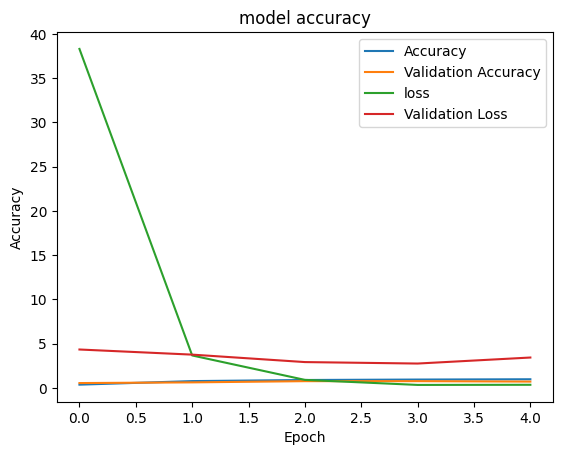

In [12]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

1/1 [==============================] - 1s 783ms/step
[[9.9995756e-01 1.9347550e-05 2.3070679e-05]]
[]
bacterial leaf spot pothos


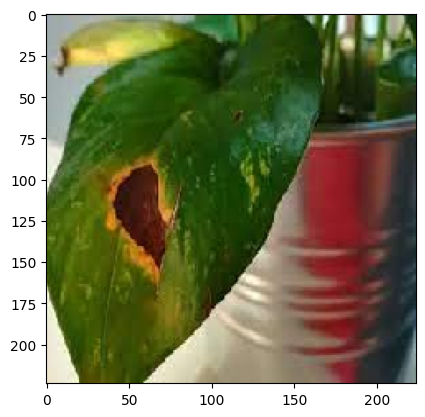

In [16]:
import keras.utils as image
img = image.load_img("/content/download (1).jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
#editHERE
saved_model = load_model("golden_pothos.h5")
output = saved_model.predict(img)
print(output)
print(output[0][np.where(output == (np.argmax(output)))[0]])
# if output[0][0] > output[0][1]:
#     print("cat")
# else:
#     print('dog')
print(names[np.argmax(output[0])])
